<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/HW6a_SurveyDataAnalysisGSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Analysis of General Social Survey Data

This is a public opinion data source that lends itself to all sorts of timely questions about a wide variety of topics. It is the leading public opinion data source in the US.


In [1]:
# Code block 1a: Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt


In [ ]:
# Code block 1b: Installing some libraries we'll need
!pip install pyreadstat
!pip install researchpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.2 MB/s eta 0:00:00


In [ ]:
# Code block 1c: Importing the new library
import researchpy as rp

You can download the data from https://gss.norc.org/us/en/gss/get-the-data.html and then copy the files to your Drive and read the data into your notebook.

I'll download the 2018 data -- the most recent survey year -- and read in the Stata file. Here's the codebook: http://www.gss.norc.org/get-documentation

I prefer to use the online data tool as an interactive codebook: https://gssdataexplorer.norc.org/variables/vfilter

We'll use the codebook to find some variables of interest and then do some basic analysis and visualization.

In [ ]:
# Code block 2: Reading in data
# The format of this data source is an SPSS data file, .sav, so we installed a library--pyreadstat--that extends pandas
# by adding another read method, read_spss. We use this to read the SPSS file into a new data object.
# I mounted my Drive in this notebook and read the file by copying the local path.
# need codebook to know what the column names mean
GSS2018_df = pd.read_stata('/content/drive/MyDrive/Data/GSS2018.dta', convert_categoricals=False) #lose labels, keep #s - if you say cat=True - lose #s and keep labels

In [ ]:
GSS2018_df.head()

,abany,abdefect,abfelegl,abhelp1,abhelp2,abhelp3,abhelp4,abhlth,abinspay,abmedgov1,abmedgov2,abmelegl,abmoral,abnomore,abpoor,abpoorw,abrape,absingle,abstate1,abstate2,acqntsex,actssoc,adminconsent,adults,advfront,affrmact,afraidof,afterlif,age,aged,agekdbrn,ancestrs,arthrtis,astrolgy,astrosci,atheists,attend,attend12,attendma,attendpa,...,wordc,wordd,worde,wordf,wordg,wordh,wordi,wordj,wordsum,workblks,workdiff,workfast,workfor1,workhard,workhsps,workwhts,wrkgovt,wrkhome,wrksched,wrkslf,wrkslffam,wrkstat,wrktime,wrktype,wrkwayup,wtss,wtssall,wtssnr,wwwhr,wwwmin,xmarsex,xmarsex1,xmovie,xnorcsiz,year,yearsjob,yearsusa,yearval,yousup,zodiac
0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,3.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,NaN,2.0,2.0,5.0,1.0,4.0,6.0,1.0,43.0,NaN,NaN,4.0,2.0,2.0,3.0,4.0,5.0,8.0,8.0,3.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,9.0,6.0,1.0,1.0,1.0,NaN,2.0,4.0,2.0,2.0,1.0,2.0,NaN,3.0,4.0,5.0,1.0,2.357493,2.357493,2.753531,20.0,0.0,1.0,1.0,NaN,6,2018,1.0,NaN,NaN,45.0,6.0
1,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,1.0,NaN,3.0,1.0,2.0,NaN,1.0,1.0,2.0,3.0,NaN,3.0,2.0,2.0,NaN,NaN,6.0,NaN,74.0,1.0,21.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN,0.942997,0.942997,1.101412,NaN,NaN,1.0,NaN,2.0,6,2018,NaN,NaN,NaN,NaN,11.0
2,NaN,NaN,NaN,1.0,2.0,1.0,1.0,NaN,2.0,1.0,NaN,3.0,3.0,NaN,NaN,3.0,NaN,NaN,1.0,2.0,NaN,1.0,2.0,2.0,3.0,4.0,NaN,1.0,42.0,1.0,35.0,3.0,2.0,2.0,3.0,3.0,2.0,9.0,9.0,8.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,6.0,4.0,2.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,2.0,NaN,1.0,3.0,5.0,3.0,0.942997,0.942997,1.101412,10.0,0.0,NaN,1.0,2.0,6,2018,15.0,NaN,NaN,3.0,1.0
3,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,2.0,1.0,2.0,NaN,3.0,NaN,NaN,63.0,1.0,32.0,NaN,1.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,4.0,1.0,1.0,2.0,1.0,4.0,4.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,5.0,3.0,0.942997,0.942997,1.101412,6.0,0.0,NaN,NaN,2.0,6,2018,25.0,NaN,NaN,10.0,1.0
4,2.0,1.0,NaN,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,3.0,1.0,2.0,2.0,NaN,2.0,2.0,NaN,3.0,NaN,1.0,1.0,2.0,NaN,NaN,3.0,NaN,71.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN,0.942997,0.942997,1.101412,NaN,NaN,1.0,NaN,2.0,6,2018,NaN,NaN,NaN,NaN,4.0


In [ ]:
# Code block 3: Inspecting variables
# I've found a relationship between variables that I want to examine: does belief about
# the human causes of climate change vary by political party.

GSS2018_df['reborn']

0       1.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2343    2.0
2344    1.0
2345    2.0
2346    2.0
2347    2.0
Name: reborn, Length: 2348, dtype: float64

In [ ]:
# Handle missing values - if the value for reborn is > 2, then list as not a number
GSS2018_df['rebornr'] = np.where(GSS2018_df['reborn'] > 2, np.nan, GSS2018_df['reborn'])
GSS2018_df['rebornr']

0       1.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2343    2.0
2344    1.0
2345    2.0
2346    2.0
2347    2.0
Name: rebornr, Length: 2348, dtype: float64

In [ ]:
# Inspect variable on political views
GSS2018_df['polviews']

0       6.0
1       NaN
2       5.0
3       4.0
4       7.0
       ... 
2343    4.0
2344    5.0
2345    4.0
2346    6.0
2347    NaN
Name: polviews, Length: 2348, dtype: float64

In [ ]:
# Handle missing values - if value for political views is > 7, then list as not a number
GSS2018_df['polviewsr'] = np.where(GSS2018_df['polviews'] > 7, np.nan, GSS2018_df['polviews'])
GSS2018_df['polviewsr']

0       6.0
1       NaN
2       5.0
3       4.0
4       7.0
       ... 
2343    4.0
2344    5.0
2345    4.0
2346    6.0
2347    NaN
Name: polviewsr, Length: 2348, dtype: float64

In [ ]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(GSS2018_df.polviewsr, GSS2018_df.rebornr, prop='col', test='chi-square')
crosstab


rebornr                
rebornr       1.0     2.0     All
polviewsr                        
1.0          3.95    6.57    5.47
2.0          7.16   16.04   12.29
3.0         11.75   11.19   11.43
4.0         37.93   38.03   37.99
5.0         12.39   12.60   12.51
6.0         19.66   13.07   15.85
7.0          7.16    2.50    4.47
All        100.00  100.00  100.00

In [ ]:
print(sigtab)

                Chi-square test  results
0  Pearson Chi-square ( 6.0) =   82.6307
1                    p-value =    0.0000
2                 Cramer's V =    0.1932


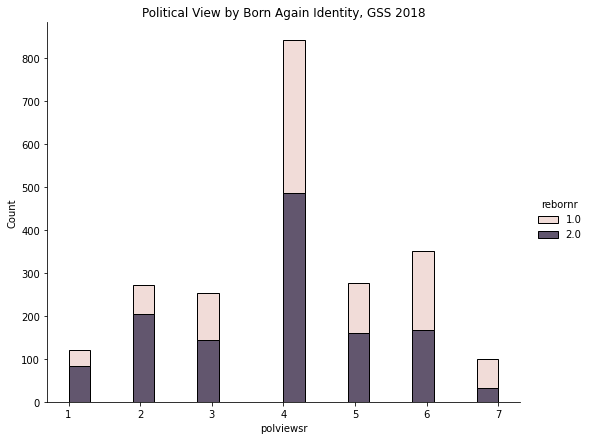

In [ ]:
p = sb.displot(GSS2018_df, x='polviewsr', hue='rebornr', multiple="stack", height=6, aspect=1.25)
plt.title('Political View by Born Again Identity, GSS 2018')
plt.show()

In [ ]:
# Code control variables
# If the #2 selected for sex variable = list as woman
GSS2018_df['women'] = np.where(GSS2018_df['sex'] == 2, 1, 0)

# If #2 selected for race variable = list as black
GSS2018_df['black'] = np.where(GSS2018_df['race'] == 2, 1, 0)

# If rincome16 > 26, then list as not a number
# Not seeing that in code book - codebook goes 1-12 & things higher than 12 are strings
GSS2018_df['rincomer'] = np.where(GSS2018_df['rincom16'] > 26, np.nan, GSS2018_df['rincom16'])

# If xnorcsiz > 7, then it is rural - 1-7 are for city
GSS2018_df['rural'] = np.where(GSS2018_df['xnorcsiz'] > 7, 1, 0)

In [ ]:
# This is the same model, with the recoded Dependent Variable, showing the same results.
# Linear model to predict belief in climate crisis
Y = GSS2018_df['polviewsr'] # A higher score indicates more climate crisis skepticism
X = GSS2018_df[['women', 'black', 'rincomer', 'rural', 'rebornr']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:              polviewsr   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     15.63
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           5.84e-15
Time:                        19:11:16   Log-Likelihood:                -2338.8
No. Observations:                1310   AIC:                             4690.
Df Residuals:                    1304   BIC:                             4721.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1428      0.192     26.772      0.0

## Activity

1. Download a GSS data file from the NORC. Copy the file to your Drive and read it into a data object.
2. Identify a dependent variable to explain.
3. Create one analysis and visualization related to your DV.
4. Sketch out a data story, keeping in mind the principles of DF.